## 03 - Evrişim operatörünü kullanarak görüntü filtreleme

(Moacir A. Ponti, ICMC/USP, 2021)

In [45]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

Önceki not defterlerinde, görüntü iyileştirme yalnızca $f(x,y)$ koordinatında değerlendirilen belirli bir pikselin girdi olarak alınmasıyla sağlanıyordu. *Görüntü filtreleme*, işlenecek pikselin etrafındaki bir mahalleyi, yani $(x,y)$ koordinatında ortalanan bir piksel bölgesini dikkate alır. Bu nedenle komşu piksellerin bir kombinasyonunu üretir. Bu kombinasyon doğrusal olduğunda bu dönüşümü **evrişim** operatörü aracılığıyla yazabiliriz.

Evrişim operatörü resmi olarak yıldız operatörü '*' ile yazılmıştır ve bu onu basit piksel bazlı bir üründen ayırmaya olanak tanır. Resmin tamamı açısından şu şekilde verilir:

$$ g = w * f$$

Yukarıdaki denklem, filtrelenmiş (işlenmiş) görüntü $g$'nin, bir işleme elemanı *w*'nın (dönüşümü tanımlayan) giriş görüntüsü $f$ ile evrişimi yoluyla elde edildiği anlamına gelir. Şimdi *w*'nin dönüşümün gerçekleşme şeklini yönlendireceğini unutmayın. Bu işleme elemanına **filtre** adı verilir ve bir ağırlık dizisi halinde düzenlenir.

Belirli bir $(x,y)$ koordinatında değerlendirilen evrişim, $f$ görüntüsünün bir pikselini filtreleyerek yeni bir piksel değeri olan $g(x,y)$'ı üretir:

$$ g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) \cdot f(x-s, y-t)$$

$w(s,t)$ filtresini indeksleyen her $s$ ve $t$ değeri için, evrişimin temelde $w$ içindeki her değeri $f(x,y)$ etrafındaki farklı konumlarla çarptığını unutmayın. $s$ ve $t$ tarafından tanımlanan vardiyalar.

Genellikle filtre $f$'dan çok daha küçüktür. Diyelim ki $w$ 'm x n' boyutunda ve $f$ 'M x N'. Bir diğer önemli açıklama, bu denklemin, filtrenin $(0,0)$ kökeninde ortalandığını, dolayısıyla $s$ ve $t$'ın negatif değerlerini varsaymasıdır.

Daha sonra, tüm değerleri işlemek için şunlardan emin olmak istiyoruz: $m = 2a+1$ ve $n = 2b+1$.

Bu nedenle, $a = \frac{m-1}{2}$, $b = \frac{n-1}{2}$, $-a$'dan $a$'a (0 merkezli) indekslemeye izin verir ve $-b$'dan $b$'a (yine 0'da ortalanmıştır).

Küçük matrislerle bir örnek yapalım.

In [46]:
np.random.seed(666) #bir tohumu tanımlama
# 5x5 boyutunda rastgele resim
f = np.random.randint(0,7, [5,5])
print(f)


[[4 2 5 6 6]
 [6 1 6 4 5]
 [3 6 3 4 4]
 [6 1 0 6 0]
 [5 2 4 5 5]]


In [47]:
# 3x3 boyutunda isteğe bağlı bir *w* filtresi tasarlayalım
w = np.matrix([[1, 2, 0], [1, 4, 0], [0, 0, 0]])/8.0
print(w)

[[0.125 0.25  0.   ]
 [0.125 0.5   0.   ]
 [0.    0.    0.   ]]


$w$'ın $f$ ile evrişimini hesaplamak istiyoruz, böylece yeni bir matris/görüntü $g$ üretiyoruz. Bunu yapabilmek için öncelikle belirli bir pikseldeki $g$ değerinin nasıl hesaplanacağını anlayacağız, örneğin $g(1,2)$.

Giriş merkezi değeri $f(1,2) = 6$'dır.

Tasarlanan filtrenin boyutu $3\time 3$'dır ve dolayısıyla $m=n=3$ olur.

Evrişim çift toplamının indeksleri olan $a$ ve $b$ değerlerini hesaplayalım. Genel formda bu şöyle olacaktır:
$$ n = 2a + 1$$
$$ 2a= n - 1$$
$$ a = \frac{n-1}{2} $$

$n$ değerini takma
$$ 3 = 2a + 1$$
$$ 2a= 3 - 1$$
$$ a = \frac{2}{2} = 1 $$

Öyleyse:

$$ g(1,2) = \sum_{s=-1}^{1} \sum_{t=-1}^{1} w(s,t) \cdot f(1-s, 2-t) )$$

Denklemin $w$'nin $(0,0)$'da ortalandığını dikkate aldığını, dolayısıyla $w$ filtresinin **endekslerinin** matematiksel olarak aşağıdaki gibi tanımlandığını unutmayın:

$$ \begin{bmatrix}
 (-1,-1) & (0,-1) & (1,-1) \\
 (-1, 0) & (0, 0) & (1, 0) \\
 (-1, 1) & (0, 1) & (1, 1)
\end{bmatrix}$$

Kodda diziler için negatif indekslerimizin bulunmadığını unutmayın, dolayısıyla bu anlamda bazı hileler yapacağız. Ama önce evrişimi manuel olarak hesaplayalım.

Pratikte denklemin gerçekleştirdiği şey, $w$'daki her değeri almak, bunu $f(1,2)$'ın komşularıyla çarpmak ve elde edilen tüm değerleri toplamaktır.

Dolayısıyla, tüm $w(s,t) \cdot f(1-s, 2-t)$ terimlerini değerlendirmek istiyoruz:

Çift toplamın ilk terimi $t = -1$ ve $s = -1$ içindir (bunlar aşağıda parantez içinde verilmiştir):
$$ w(-1,-1) \cdot f(1- (-1) ,2- (-1)) = 0,125 \cdot f(2,3)$$

İkinci terim, $t=-1, s=0$:
$$ w(-1, 0) \cdot f(1-(-1),2-(0)) = 0,125 \cdot f(2,2)$$

Üçüncü terim, $t=-1, s=1$:
$$ w(-1, 1) \cdot f(1-(-1),2-(1)) = 0,0 \cdot f(2,1)$$

Dördüncü terim, $t=0, s=-1$:
$$ w(0,-1) \cdot f(1-(0),2-(-1)) = 0,25 \cdot f(1,3)$$

Ve benzeri. Filtrenin ilk üç değerinin filtrenin **ilk sütunuyla** ilişkili olduğuna dikkat edin: `[0.125, 0.125 , 0.0 ]`. Bunlar, görüntünün **ikinci satırındaki** değerleri, ancak ters sırada, koordinatlarda (2,3), (2,2) ve (2,1) şu değerlere göre çarpıyor: `[4 , 3, 6]' (görüntünün ikinci satırında bu diziyi arayın, ancak ters sırada, bu, evrişim tanımındaki 1-s ve 2-t'nin çıkarılmasından kaynaklanmaktadır)

Bu nedenle evrişim, $(x,y)$'da ortalanan görüntü pikselleri ile *çevrilmiş filtrenin* değerleri arasında noktasal bir çarpma gerçekleştirir. Bu çevirme, görüntü işleme (bilgisi uzaysal olan) açısından pek anlamlı olmayabilir, ancak evrişim tanımının geldiği sinyal işleme (zaman bilgisi) açısından anlamlıdır.

Bu nedenle öncelikle filtreyi çevirerek uygulamayı kolaylaştıralım.

In [48]:
wf = np.flip( np.flip(w,0) , 1)
print(wf)

[[0.    0.    0.   ]
 [0.    0.5   0.125]
 [0.    0.25  0.125]]


Now we can just run a point-wise multiplication centred at (x,y)

In [49]:
# g(1,2)'yi hesaplamak istediğimizi bilerek, matrisin sadece ihtiyacımız olan kısmını çıkaralım
x = 1
y = 2
# daha önce hesaplanan a ve b'yi kullanarak x-1'den x+1'e, y-1'den y+1'e kadar olan bölgeyi istiyoruz.
# ancak Python'da -A:B aralığı bir dizi oluşturur [A, A+1, A+2, ..., B-2, B-1], bu nedenle sonunda 2 kullanırız
# (x=1,y=2)'nin mahallesini yazdıralım
print(f[ x-1:x+2 , y-1:y+2 ])

[[2 5 6]
 [1 6 4]
 [6 3 4]]


In [50]:
# ilk önce bölge ile ters çevrilmiş filtre arasında noktasal çarpma işlemi gerçekleştirin
conv1 = np.multiply(f[ x-1:x+2 , y-1:y+2 ], wf)
conv1

matrix([[0.  , 0.  , 0.  ],
        [0.  , 3.  , 0.5 ],
        [0.  , 0.75, 0.5 ]])

In [51]:
# sonra ortaya çıkan her değeri toplarız
g_1_2 = np.sum(conv1)
g_1_2

4.75

In [52]:
# bu toplam daha sonra sayıyı yuvarlayarak bir tamsayı değerine dönüştürülebilir (taban)
g_1_2 = int(np.sum(conv1))
g_1_2

4

In [53]:
# x,y piksellerinde evrişim gerçekleştiren kendi fonksiyonumuzu uygulayalım
# uygulamayı kolaylaştırmak için filtrenin tek boyutlu olduğu varsayılır (n veya m için)
def conv_point(f, w, x, y, debug=False):
    n,m = w.shape
    a = int((n-1)/2)
    b = int((m-1)/2)
    # piksel komşuluğunun alt matrisini alır
    sub_f = f[ x-a : x+a+1 , y-b:y+b+1 ]

    # filtreyi çevirir
    w_flip = np.flip( np.flip(w, 0) , 1)

    # dizileri göstererek işlevin hatalarını ayıklamak için koşullu
    if (debug==True):
        print("sub-image f:\n" + str(sub_f))
        print("\nflipped filter w:\n" + str(w_flip))

    # evrişimi gerçekleştirir (int'ye dönüştürmeden)
    value = np.sum( np.multiply(sub_f, w_flip))
    return value


In [54]:
# hadi bir koordinat için test edelim
conv_point(f, w, 3, 1)

1.5

İşe yarıyor gibi görünüyor! Şimdi $f$'nin TÜM pikselleri üzerinde $w$ ile evrişimi değerlendirebilir ve filtrelenmiş $g$ görüntüsünü üretebiliriz. Bunu yapmak için bir fonksiyon uygulayalım

In [55]:
# w filtresiyle f görüntüsünün tüm piksellerinde evrişim gerçekleştirir
def image_convolution(f, w, debug=False):
    N,M = f.shape

    # işlenmiş değerleri depolamak için yeni bir boş resim oluşturur
    g = np.empty(f.shape, dtype=np.uint8)

    # her pikselde döngü yapar:
    for x in range(N):
        for y in range(M):
            # uint8'e dönüştürme işlemi gerçekleştirin
            g[x,y] = conv_point(f, w, x, y, debug).astype(np.uint8)


In [56]:
#fonksiyonu kullanarak...
g = image_convolution(f, w)

ValueError: operands could not be broadcast together with shapes (0,0) (3,3) 

Sorun ne olmalı? Her şey yolunda görünüyordu. Matrisleri ve filtreleri yazdırmak için hata ayıklama argümanını true olarak kullanalım.

In [66]:
g = image_convolution(f, w, debug=True)

**negatif** dizin değerlerine erişmeye çalıştığı için işlevin $f(0,0)$ için bir $f$ alt görüntüsü oluşturamadığına dikkat edin. Örneğin tasarladığımız filtre için $a = 1$ ve $b = 1$ ise alt matris şu şekilde verilir:
    
`sub_f = f[ x-(a) : x+(a+1) , y-(b) : y+(b+1) ]
       = f[ 0-(1) : 0+(1+1) , 0-(1) : 0-(1+1) ]
       = f[ -1 : 2 , -1 : 2 ]'

Aralık, hem satırda hem de sütunda -1 indeksine sahip, dizi sınırlarının dışında olan $f$ bölgelerini içerir. Bu nedenle görüntünün sınırındaki pikseller pratikte hesaplanamaz. Yalnızca pikselleri işleyerek bunlardan kaçınalım:

x "0+a"dan "N-a"ya

y '0+b'den 'M-b'ye

Kenarlık pikselleri şimdilik göz ardı ediliyor. Fonksiyonları değiştirdiğimiz için *döndürülmüş filtreyi* yalnızca bir kez hesaplayabilir ve evrişimi gerçekleştirebiliriz, böylece kendi kendine yeten bir görüntü evrişim fonksiyonuna sahip oluruz

In [67]:
def image_convolution(f, w, debug=False):
    N,M = f.shape
    n,m = w.shape

    a = int((n-1)/2)
    b = int((m-1)/2)

    # ters çevrilmiş filtre
    w_flip = np.flip( np.flip(w, 0) , 1)
    Filtrelenen pikselleri saklayacak # yeni resim
    g = np.zeros(f.shape, dtype=np.uint8)

    # her piksel için
    for x in range(a,N-a):
        for y in range(b,M-b):
            # alt görüntü alıyor
            sub_f = f[ x-a : x+a+1 , y-b:y+b+1 ]
            if (debug==True):
                print(str(x)+","+str(y)+" - subimage:\n"+str(sub_f))
            # (x,y)'de g'yi hesaplar
            g[x,y] = np.sum( np.multiply(sub_f, w_flip)).astype(np.uint8)

    return g

SyntaxError: invalid syntax (<ipython-input-67-597921752c26>, line 10)

In [68]:
g = image_convolution(f, w)
print(g)

None


Sınırlarda sıfır değer üretmemenin bir alternatifi orijinal değerleri korumaktır.

In [69]:
def image_convolution(f, w, debug=False):
    N,M = f.shape
    n,m = w.shape

    a = int((n-1)/2)
    b = int((m-1)/2)

    # ters çevrilmiş filtre
    w_flip = np.flip( np.flip(w, 0) , 1)
    # Filtrelenen pikselleri saklayacak yeni resim
    # kenarlık piksellerinin aynı kalması için orijinal 'f' görüntüsünü kopyalar
    g = np.array(f, copy=True)

    # her piksel için
    for x in range(a,N-a):
        for y in range(b,M-b):
            # alt görüntü alıyor
            sub_f = f[ x-a : x+a+1 , y-b:y+b+1 ]
            if (debug==True):
                print(str(x)+","+str(y)+" - subimage:\n"+str(sub_f))
            # (x,y)'de g'yi hesaplar
            g[x,y] = np.sum( np.multiply(sub_f, w_flip)).astype(np.uint8)

    return g

In [70]:
g = image_convolution(f, w)
print(g)

[[4 2 5 6 6]
 [6 3 4 4 5]
 [3 3 2 4 4]
 [6 1 2 4 0]
 [5 2 4 5 5]]


Yaygın olarak kullanılan bir strateji, tüm piksellerin, hatta kenarlığın bile işlenmesine izin verecek şekilde *orijinal görüntüyü genişletmektir*.

**Sıfır doldurma**: Orijinal görüntü, fazladan satır ve sütunların sıfır değerlerle doldurulmasıyla 'çerçevelenir'. Evrişimi gerçekleştirdikten sonra $g$'ı orijinal hacmine kırparız. Bir alıştırma olarak, bu yönteme bir seçenek olarak izin vermek için evrişim işlevini değiştirin.

### Görüntüleri filtreleme

Filtreler farklı amaçlarla tasarlanabilmektedir.
En sık kullanılan filtreler şunlardır: **düzleştirme** filtreleri, daha az yerel değişkenliğe sahip görüntüler üretir, gürültüyü azaltır, ancak aynı zamanda küçük ayrıntıları ve dokuyu da bastırır; ve türev operatörü olarak çalışan, yerel geçişleri tespit etmek, yerel varyasyonu geliştirmek, görüntüde varsa ayrıntıları ve gürültüyü artırmak için kullanılabilen **diferansiyel** filtreler.

Bazı örnekler gösterelim

In [71]:
img1 = imageio.imread("/content/board.jpg")
img2 = imageio.imread("/content/gradient_noise.png")
img3 = imageio.imread("/content/board.jpg")

<ipython-input-71-8a4dc27c7cfe>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread("/content/board.jpg")
<ipython-input-71-8a4dc27c7cfe>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread("/content/gradient_noise.png")
<ipython-input-71-8a4dc27c7cfe>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img3 = imageio.imread("/content/board.jpg")


In [72]:
# tüm komşuları dikkate alarak 3x3 (simetrik) bölgesinde bir ortalama üreten ortalama bir filtre
w_mean = np.matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
print(w_mean)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


(-0.5, 319.5, 319.5, -0.5)

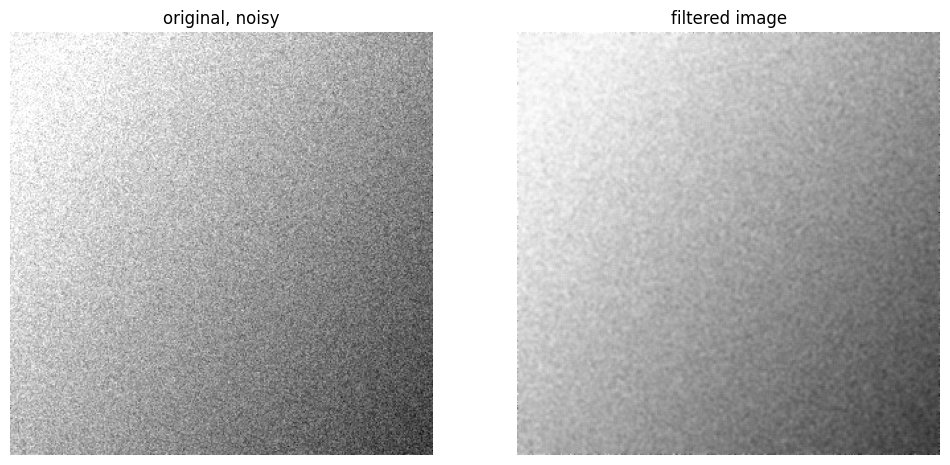

In [73]:
img2_mean = image_convolution(img2, w_mean)

# görseller gösteriliyor
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.title("original, noisy")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2_mean, cmap="gray", vmin=0, vmax=255)
plt.title("filtered image")
plt.axis('off')

Filtrelenen görüntünün kenarlığında, orijinal görüntüden saklanan pikseller bulunduğunu unutmayın; çünkü kenarlıktaki *a* piksellerini ($a = (m-1)/2$ ile verilir) işleyemiyoruz; burada *m*, filtre boyutu.

Filtrenin yan boyutu $3$ olduğunda, o zaman $a = 1$ yani kenar boyutu 1 olur.

Eğer daha büyük bir filtremiz olsaydı, mesela $n,m=7$ yan boyutuyla, o zaman $a,b=3$ ve 3 kenarlık pikseli işlenmezdi. Alıştırma olarak, bu etkiyi görmek için $7\time 7$ veya daha büyük bir filtre tasarlayın.

Başka filtreler tasarlayalım. İlk olarak diferansiyel filtre ve ardından rastgele filtre.

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


(-0.5, 499.5, 464.5, -0.5)

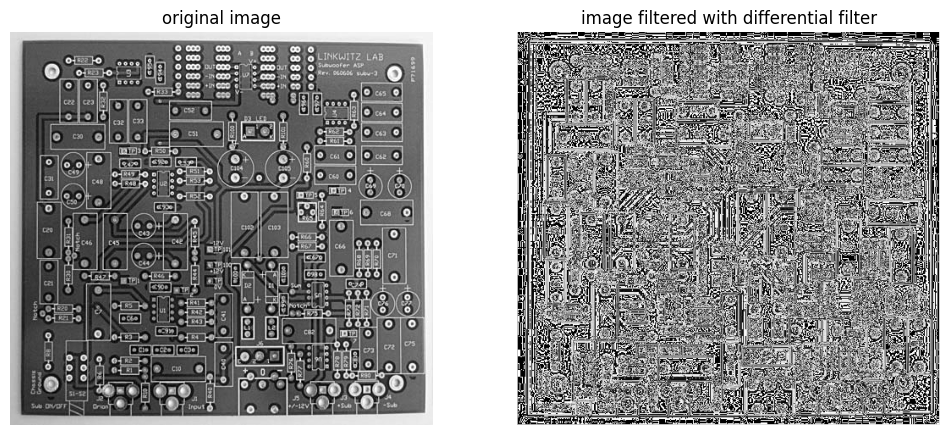

In [74]:
w_diff = np.matrix([[ 0, -1,  0],
                    [-1,  4, -1],
                    [ 0, -1,  0]])
print(w_diff)

img1_diff = image_convolution(img1, w_diff)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_diff, cmap="gray", vmin=0, vmax=255)
plt.title("image filtered with differential filter")
plt.axis('off')

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


(-0.5, 499.5, 464.5, -0.5)

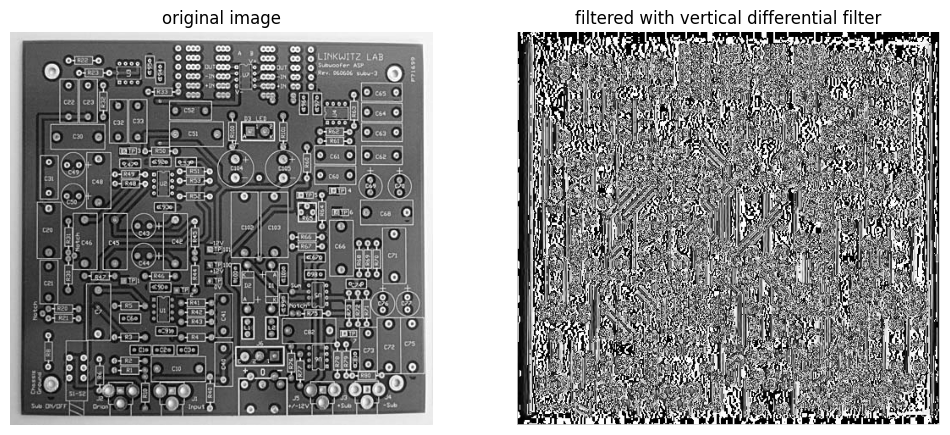

In [75]:
# başka bir diferansiyel filtre, ancak yönlü (dikey)
w_vert = np.matrix([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
print(w_vert)

img1_vert = image_convolution(img1, w_vert)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_vert, cmap="gray", vmin=0, vmax=255)
plt.title("filtered with vertical differential filter")
plt.axis('off')

Yukarıdaki filtreleri incelerseniz, hepsinin piksel değerlerinin yayılması (düzleştirme, örneğin ortalama filtre) veya geçişlerin tespit edilmesi (diferansiyel filtreler, örneğin dikey kenarlıklar) açısından bir tür efekt üretmek üzere tasarlandığını görürsünüz.

Peki ya *rastgele bir filtremiz* varsa?

[[0.5876144  0.86014445 0.82936987 0.65091808 0.51832728 0.00355049
  0.80309176]
 [0.35932938 0.42014544 0.2026436  0.63279787 0.18935861 0.1308497
  0.75765845]
 [0.34158167 0.52138487 0.88302327 0.44914216 0.23902229 0.33014086
  0.26650938]
 [0.79768204 0.05551712 0.12980746 0.82262638 0.36076783 0.56970121
  0.83023273]
 [0.44767601 0.2132831  0.56115445 0.71657783 0.7493205  0.58624783
  0.54759891]
 [0.0817732  0.40852941 0.63205157 0.12168885 0.27480879 0.07770505
  0.15726591]
 [0.14978044 0.38535367 0.70941476 0.44518764 0.01584702 0.99491381
  0.90632665]]


(-0.5, 499.5, 464.5, -0.5)

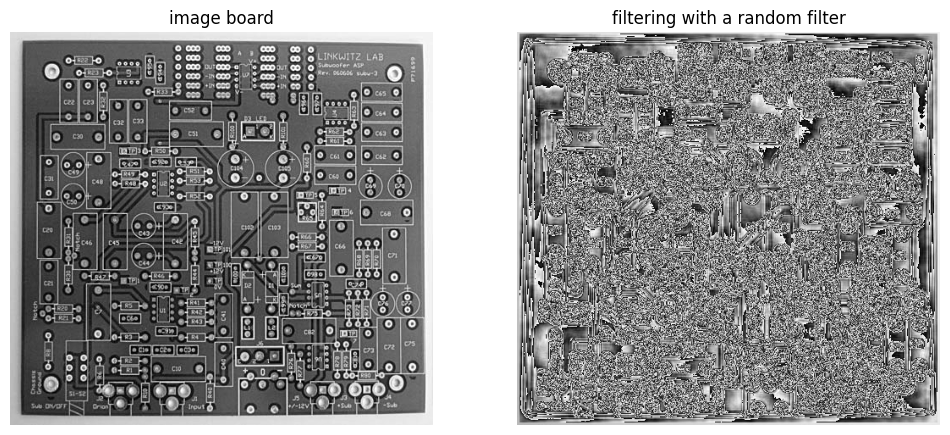

In [76]:
w_rand = np.random.random([7,7])
print(w_rand)
img3_wrand = image_convolution(img3, w_rand)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.title("image board")
plt.axis('off')
plt.subplot(122)
plt.imshow(img3_wrand, cmap="gray", vmin=0, vmax=255)
plt.title("filtering with a random filter")
plt.axis('off')

İyi görünmüyor! Peki bu rastgele filtrenin bir etkisi mi yoksa başka bir sorun mu var?

Filtremiz toplamı 1'den çok daha fazla olan pozitif değerlere sahip olduğundan yerel bölgelerin enerjisi artacaktır. Bu, ilk başta yalnızca görüntünün parlaklığını artıracaktır. Ama aslında 8 bitte çalıştığımız için bu tür ardışık evrişimlerin etkisi *taşma* oluyor


In [77]:
np.sum(w_rand)

22.725444063181403

Bunu, örneğin filtreyi toplam 1'e normalleştirerek düzeltebiliriz.

[[0.0020856  0.0345359  0.0205467  0.00044743 0.01977895 0.02210209
  0.01093444]
 [0.00927139 0.03844961 0.02670581 0.03369959 0.00589278 0.00577373
  0.01237147]
 [0.01484763 0.01277653 0.02255842 0.01861541 0.03211556 0.03158158
  0.03382279]
 [0.02760608 0.01277728 0.03762172 0.01632976 0.03021817 0.02031651
  0.03306071]
 [0.0194952  0.00716881 0.0318169  0.00558505 0.02861831 0.01536286
  0.02824247]
 [0.03323885 0.02332636 0.01552043 0.01590321 0.00603237 0.00354391
  0.0320896 ]
 [0.03480028 0.03556013 0.03058466 0.008659   0.0241916  0.007095
  0.00632136]]


(-0.5, 499.5, 464.5, -0.5)

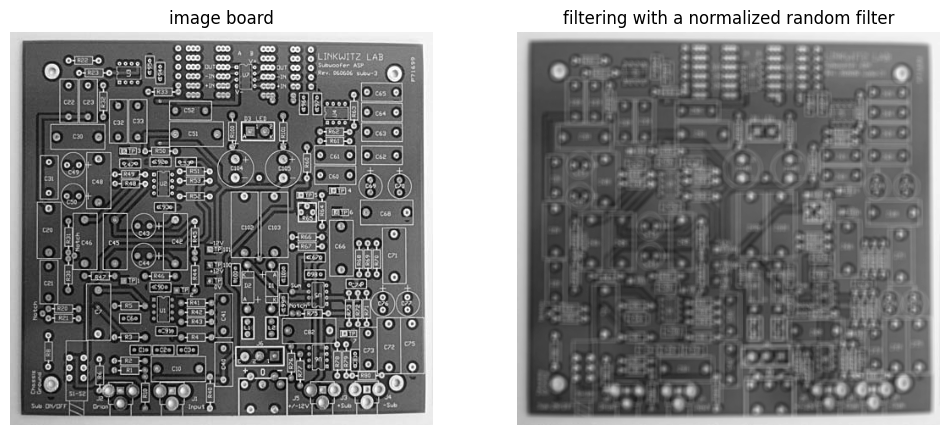

In [78]:
w_rand = np.random.random([7,7])
w_rand = w_rand/np.sum(w_rand)
print(w_rand)
img3_wrand = image_convolution(img3, w_rand)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.title("image board")
plt.axis('off')
plt.subplot(122)
plt.imshow(img3_wrand, cmap="gray", vmin=0, vmax=255)
plt.title("filtering with a normalized random filter")
plt.axis('off')

Artık görüntüyü görselleştirebiliyoruz ancak rastgele bir filtrenin görselleştirme açısından yararlı bir görüntü oluşturmadığını, hatta herhangi bir belirli özelliği geliştirmediğini unutmayın. Aslında bu bir rastgele yumuşatma filtresi veya rastgele ağırlıklı ortalama filtresidir.

Başka bir olası rastgele filtre, rastgele bir diferansiyel filtre oluşturmak ve onu sıfır toplamlı negatif ve pozitif değer içerecek şekilde normalleştirmek olabilir. Bunu bir egzersiz olarak deneyin!

Bu nedenle, elde etmek istediğimiz yerel dönüşüm açısından filtreyi dikkatli tasarlamalıyız.

Uygulanan filtreleri tekrar inceleyin, hangi özellikleri iyileştirdiklerine göre sınıflandırmaya çalışın. Efektlerini görmek için boyutları değiştirerek ve görüntüleri filtreleyerek başka filtreler tasarlayın.